# Explore Wagga Exposure Data


In [1]:
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt

### City council data

In [2]:
#Wagga file
wagga_filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Wagga Exposure Data/Wagga_Building_Estimated_Levels.zip'

In [3]:
df = gpd.read_file(wagga_filepath)
df.head()

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,geometry
0,535412.51,6113371.37,C,1,180.865,180.875,Hammond Ave,POINT Z (535412.512 6113371.372 0.000)
1,535344.34,6113383.15,C,1,180.850,180.860,Hammond Ave,POINT Z (535344.344 6113383.150 0.000)
2,535435.24,6113365.07,C,1,179.938,179.948,Hammond Ave,POINT Z (535435.238 6113365.073 0.000)
3,535448.11,6113350.30,C,1,179.923,179.933,Hammond Ave,POINT Z (535448.110 6113350.296 0.000)
4,535469.74,6113358.36,R,1,179.931,180.231,Hammond Ave,POINT Z (535469.738 6113358.365 0.000)


/Users/Fangyuan/miniconda/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: ylabel='Frequency'>

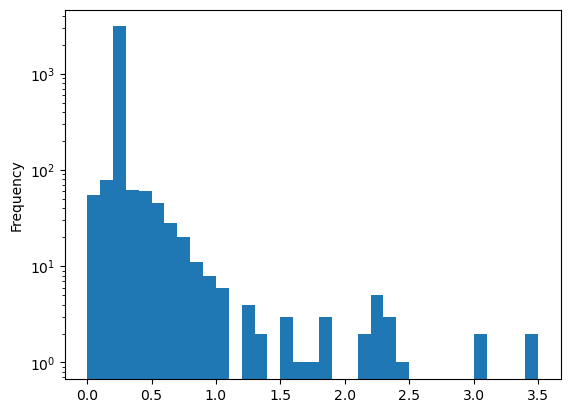

In [4]:
df_r = df[df.Residental=='R']
df_r['Floor_Height'] = df_r.Floor_Leve - df_r.Ground_Lev

df_r.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True)

# of Multiples of 0.28: 3018
483


<Axes: ylabel='Frequency'>

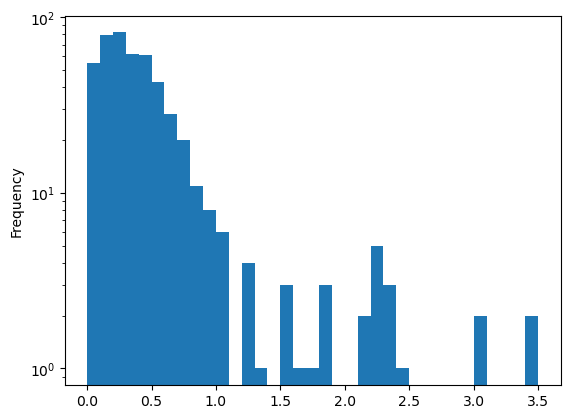

In [5]:
# Multiples off 0.28 are likely from ccounting stairs, not surveyed

multiples = np.isclose(df_r.Floor_Height.values, 0.28, atol=1e-3)
for i in np.arange(2, df_r.Floor_Height.max()/0.28+1):
    multiples = multiples | np.isclose(df_r.Floor_Height.values, 0.28*i, atol=1e-3)

print("# of Multiples of 0.28:",multiples.sum())
df_surveyed = df_r[~multiples]
print(len(df_surveyed))
df_surveyed.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True)


Text(0.5, 0, 'Floor height')

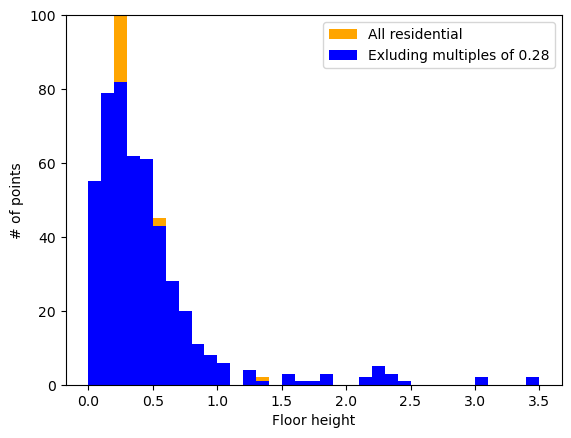

In [6]:
bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1)
logy=False
df_r.Floor_Height.plot.hist(bins=bins, logy=logy,density=False, color='orange',label='All residential')
df_surveyed.Floor_Height.plot.hist(bins=bins, logy=logy, density=False, color='blue', label='Exluding multiples of 0.28')

plt.ylim(0,100)
plt.legend()
plt.ylabel('# of points')
plt.xlabel('Floor height')

In [7]:
df_surveyed.to_file('Wagga_Building_Estimated_Levels_Surveyed.geojson', driver='GeoJSON')

In [8]:
df_r['surveyed'] = ~multiples

/Users/Fangyuan/miniconda/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


## Compare with GA combined data

In [9]:
#combined data file
ga_filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Wagga Exposure Data/Final_Wagga.UFI.zip'

In [10]:
df_combined = gpd.read_file(ga_filepath)
df_combined.head()


,WALL_M,STEPS,USAGE,STOREYS,ASSESSOR,address,Area_1,PMF,Dep_500,Dep_200,Dep_100,Dep_50,Dep_20,Dep_10,Ground_Lev,Floor_Leve,AGE,UFI,ZONE_DESCR,geometry
0,Metal,1,Commercial,1,ROBERT,3 MOORONG STREET,721.960449,3.6338,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,178.856,179.136,> 1960,2128,Light Industrial,POINT (531766.431 6115534.538)
1,Metal,1,Commercial,1,ROBERT,3 MOORONG STREET,314.036351,3.4780,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,178.856,179.136,> 1960,2129,Light Industrial,POINT (531713.009 6115541.678)
2,Metal,1,Commercial,1,ROBERT,UNIT 1 29 MOORONG STREET,1783.805231,3.2973,0.9431,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,179.137,179.417,> 1960,2130,Light Industrial,POINT (531622.148 6115320.487)
3,Metal,1,Commercial,1,ROBERT,UNIT 1 29 MOORONG STREET,346.207850,4.6240,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,178.455,178.735,> 1960,2141,Light Industrial,POINT (531707.773 6115277.768)
4,Metal,1,Commercial,1,ROBERT,11 MOORONG STREET,615.235606,3.4026,-9999.0000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,178.997,179.277,> 1960,2156,Light Industrial,POINT (531756.903 6115457.675)


In [11]:
df_combined_r = df_combined[df_combined.USAGE=='Residential']
df_combined_r['Floor_Height'] = df_combined_r.Floor_Leve - df_combined_r.Ground_Lev

/Users/Fangyuan/miniconda/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [12]:
df_combined_r.STEPS.unique()

array([ 1,  2,  8,  3,  5, 12,  6,  4, 15, 13,  7,  9])

<Axes: ylabel='Frequency'>

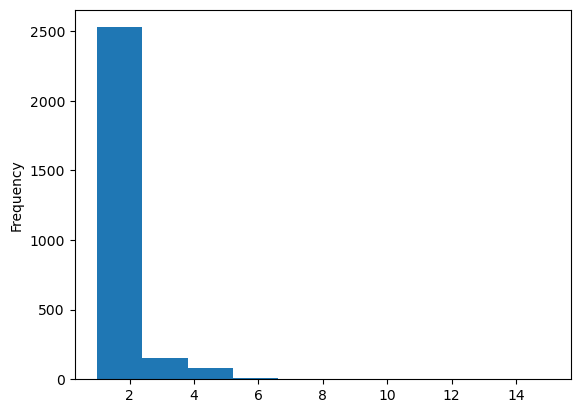

In [13]:
df_combined_r.STEPS.plot.hist()

In [14]:
# count of average step of 0.28
np.isclose(df_combined_r.Floor_Height/df_combined_r.STEPS, 0.28, atol=1e-3).sum()

2069

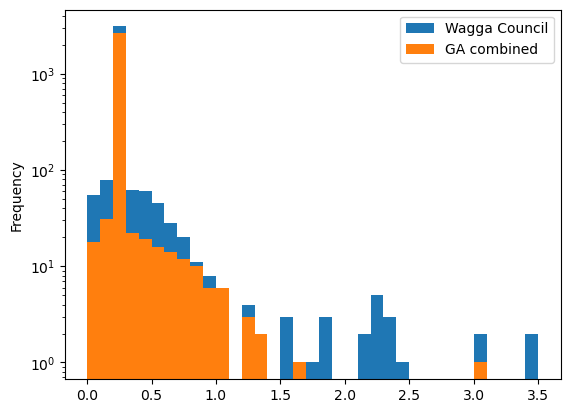

In [15]:
df_r.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True, label='Wagga Council')
df_combined_r.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True, label='GA combined')
plt.legend()

# of Multiples of 0.28: 2590
194


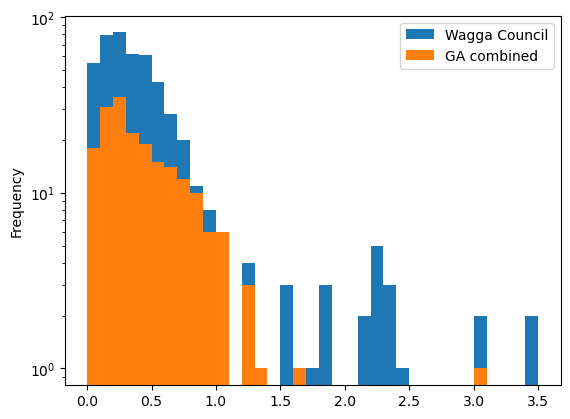

In [16]:

multiples = np.isclose(df_combined_r.Floor_Height.values, 0.28, atol=1e-3)
for i in np.arange(2, df_combined_r.Floor_Height.max()/0.28+1):
    multiples = multiples | np.isclose(df_combined_r.Floor_Height.values, 0.28*i, atol=1e-3)

print("# of Multiples of 0.28:",multiples.sum())
df_combined_surveyed = df_combined_r[~multiples]
print(len(df_combined_surveyed))

df_surveyed.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True, label='Wagga Council')
df_combined_surveyed.Floor_Height.plot.hist(bins=np.arange(0,df_r.Floor_Height.max()+0.1,0.1), logy=True, label='GA combined')
plt.legend()

In [17]:
#df_combined_surveyed.to_file('Final_Wagga_Surveyed.geojson', driver='GeoJSON')

### Do matched points in council and final data have the same floor height?

In [18]:
nearby_points = gpd.sjoin_nearest(df_r, df_combined_r, max_distance=10, how='inner', distance_col="distance")
len(nearby_points)

1773

In [19]:
# of mismatch
(np.abs(nearby_points.Floor_Height_left-nearby_points.Floor_Height_right)>1e-3).sum()

1

### What about NEXIS building data

In [20]:
nexis_filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/nexis_building_data/wagga_nexis.gpkg'

In [21]:
df_nexis = gpd.read_file(nexis_filepath)
df_nexis.head()

,LID,LONGITUDE,LATITUDE,STE_CODE,STATE_ABBREV,STATE_NAME,SA1_CODE,SA2_CODE,SA2_Name,SUBURB,...,GENERIC_EXT_WALL,flood_vulnerability_function_id,floor_height_(m),floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,geometry
0,GNAF_GANSW716863655,147.318018,-35.170384,1,NSW,New South Wales,11303126901,113031269,Wagga Wagga - South,Springvale NSW,...,brick_veneer,FCM7,1.018,101.8,0,1.0,925970,77100,20240506-2121.b13ac.15-9,POINT (147.31802 -35.17038)
1,GNAF_GANSW716863648,147.319940,-35.170342,1,NSW,New South Wales,11303126901,113031269,Wagga Wagga - South,Springvale NSW,...,brick_veneer,FCM7,2.639,263.9,0,1.0,925970,77100,20240506-2121.b13ac.15-9,POINT (147.31994 -35.17034)
2,GNAF_GANSW705151502,147.380618,-35.170314,1,NSW,New South Wales,11303126716,113031267,Wagga Wagga - East,Lake Albert NSW,...,brick_veneer,FCM8,0.426,42.6,0,1.0,853263,77100,20240506-2121.b13ac.15-9,POINT (147.38062 -35.17031)
3,RU25K532647610801255,147.358523,-35.170301,1,NSW,New South Wales,11303126912,113031269,Wagga Wagga - South,SPRINGVALE,...,brick_veneer,FCM7,0.653,65.3,0,1.0,925970,77100,20240506-2121.b13ac.15-9,POINT (147.35852 -35.17030)
4,GNAF_GANSW705139902,147.384137,-35.170284,1,NSW,New South Wales,11303126702,113031267,Wagga Wagga - East,Lake Albert NSW,...,brick_veneer,FCM7,0.564,56.4,0,1.0,790750,77100,20240506-2121.b13ac.15-9,POINT (147.38414 -35.17028)


In [22]:
df_nexis = df_nexis.to_crs(df_r.crs)

In [23]:
nearby_points = gpd.sjoin_nearest(df_r, df_nexis, max_distance=15, how='inner', distance_col="distance")
print("# of match", len(nearby_points))

# Calculate correlation
correlation = nearby_points['floor_height_(m)'].corr(nearby_points['Floor_Height'])
print(f"Correlation between {'floor_height_(m)'} and {'Floor_Height'}: {correlation}")

# of mismatch
print("# of mismatched height", (np.abs(nearby_points['floor_height_(m)']-nearby_points.Floor_Height)>1e-3).sum())

# of match 2692
Correlation between floor_height_(m) and Floor_Height: 0.0005544456160735768
# of mismatched height 2244


In [24]:
df_nexis.columns

Index(['LID', 'LONGITUDE', 'LATITUDE', 'STE_CODE', 'STATE_ABBREV',
       'STATE_NAME', 'SA1_CODE', 'SA2_CODE', 'SA2_Name', 'SUBURB', 'POSTCODE',
       'LGA_CODE', 'LGA_NAME', 'UCL_CODE', 'UCL_NAME', 'NEXIS_USE_II',
       'NEXIS_CONSTRUCTION_TYPE', 'LOCAL_YEAR_BUILT', 'NEXIS_YEAR_BUILT',
       'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL',
       'flood_vulnerability_function_id', 'floor_height_(m)',
       'floor_height_(cm)', 'LOCAL_NO_OF_STOREYS', 'NEXIS_NO_OF_STOREYS',
       'REPLACEMENT_VALUE', 'CONTENTS_VALUE', 'BATCH', 'geometry'],
      dtype='object')

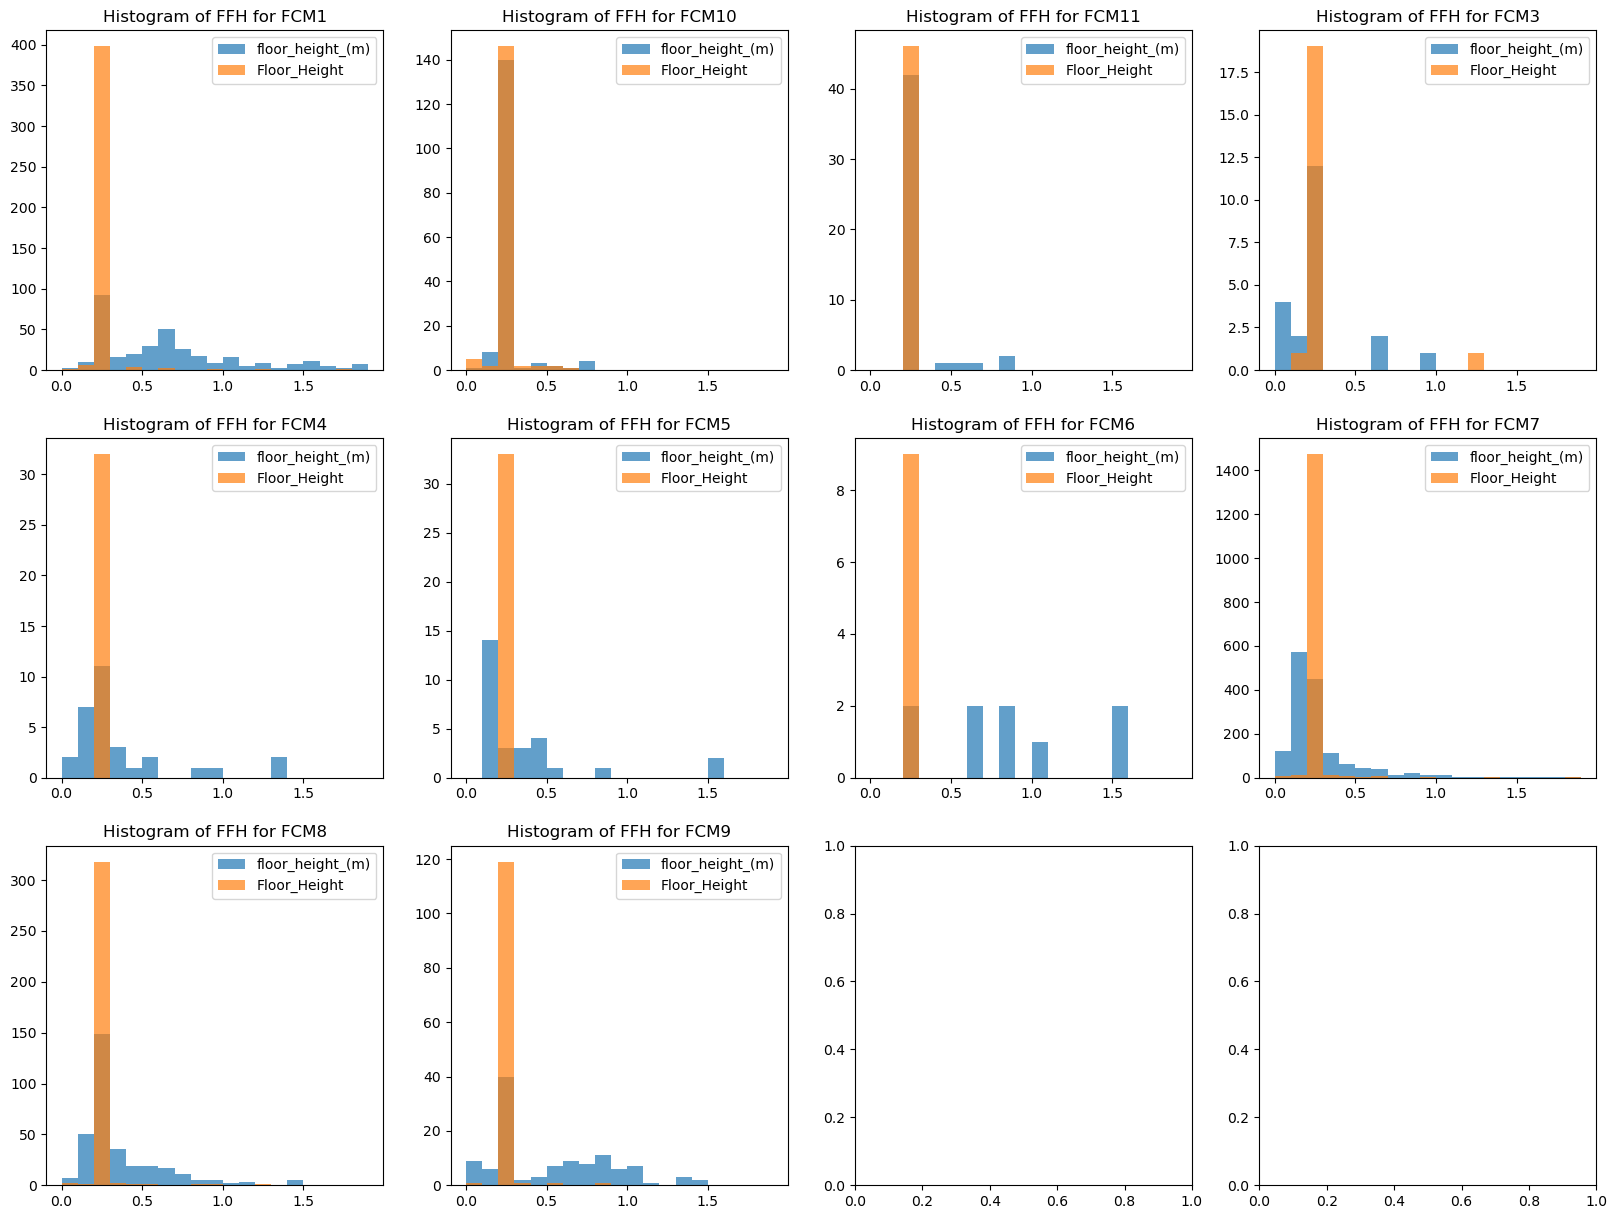

In [25]:
unique_build_types = np.sort(nearby_points['flood_vulnerability_function_id'].unique())
num_build_types = len(unique_build_types)
fig, axes = plt.subplots(nrows=(num_build_types + 3) // 4, ncols=4, figsize=(20, 5 * ((num_build_types + 3) // 4)))
axes = axes.flatten()

ffh_col_1 = 'floor_height_(m)'
ffh_col_2 = 'Floor_Height'
for ax, build_type in zip(axes, unique_build_types):
    group = nearby_points[nearby_points['flood_vulnerability_function_id'] == build_type]
        
    ax.hist(group[ffh_col_1][group[ffh_col_1]>=0], bins=np.arange(0,2,0.1), alpha=0.7, label=ffh_col_1, density=False)
    ax.hist(group[ffh_col_2][group[ffh_col_2]>=0], bins=np.arange(0,2,0.1), alpha=0.7, label=ffh_col_2, density=False)
    
    ax.set_title(f'Histogram of FFH for {build_type}')
    ax.legend()

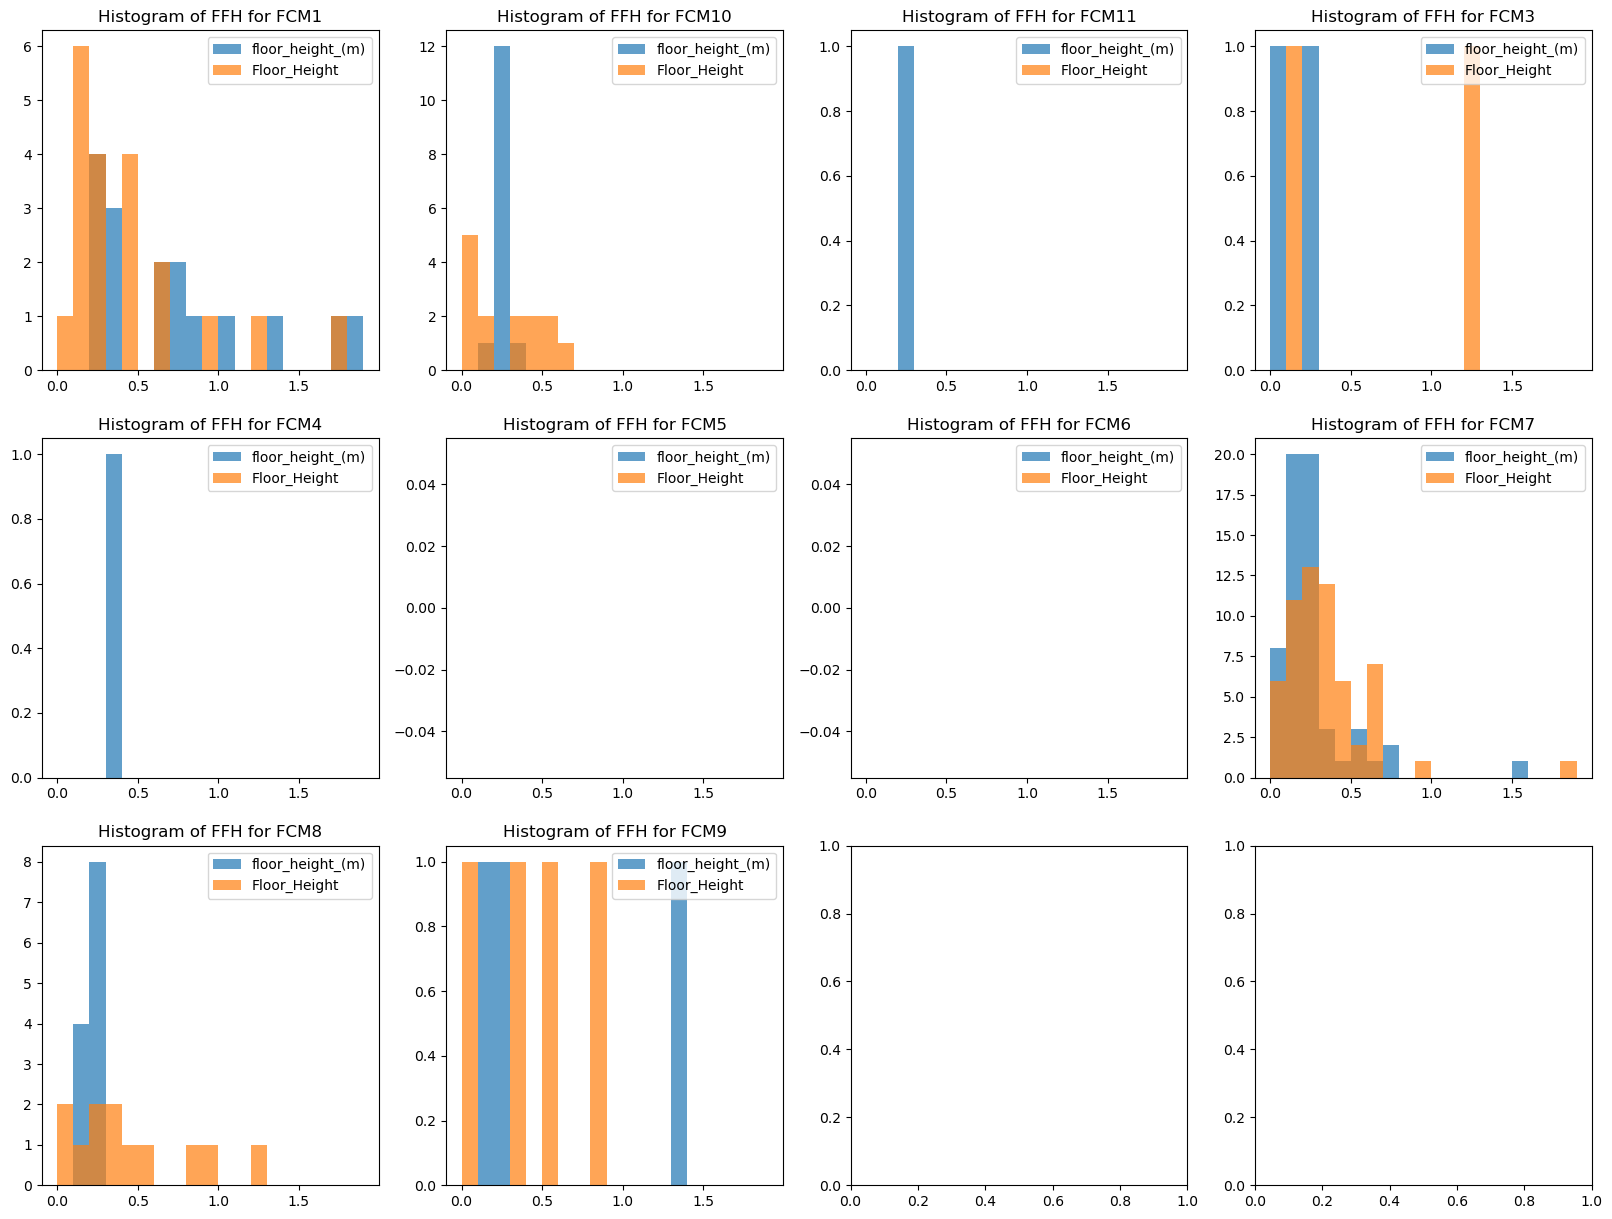

In [26]:

fig, axes = plt.subplots(nrows=(num_build_types + 3) // 4, ncols=4, figsize=(20, 5 * ((num_build_types + 3) // 4)))
axes = axes.flatten()

ffh_col_1 = 'floor_height_(m)'
ffh_col_2 = 'Floor_Height'
for ax, build_type in zip(axes, unique_build_types):
    group = nearby_points[nearby_points['flood_vulnerability_function_id'] == build_type]
    group = group[group['surveyed']==True]
        
    ax.hist(group[ffh_col_1][group[ffh_col_1]>=0], bins=np.arange(0,2,0.1), alpha=0.7, label=ffh_col_1, density=False)
    ax.hist(group[ffh_col_2][group[ffh_col_2]>=0], bins=np.arange(0,2,0.1), alpha=0.7, label=ffh_col_2, density=False)
    
    ax.set_title(f'Histogram of FFH for {build_type}')
    ax.legend()

OK match of surveyed floor height and floor_height in NEXIS

Full council data or GA combined data have poor correlation with NEXIS floor height

### Building footprint

In [27]:

overture_filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/Data Exploration/overture/wagga_building.gpkg'

In [28]:
footprint = gpd.read_file(overture_filepath)

In [29]:
footprint.head()

,min_height_ahd,max_height_ahd,geometry
0,260.380,261.404,"POLYGON ((147.29572 -35.16853, 147.29565 -35.1..."
1,263.089,264.092,"POLYGON ((147.29576 -35.16826, 147.29572 -35.1..."
2,262.491,262.949,"POLYGON ((147.29619 -35.16818, 147.29614 -35.1..."
3,264.359,264.692,"POLYGON ((147.29691 -35.16755, 147.29686 -35.1..."
4,277.474,277.954,"POLYGON ((147.29089 -35.16621, 147.29080 -35.1..."


In [30]:
footprint.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
nearby_points.rename(columns={'index_right':'index_nexis'}, inplace=True)

In [46]:
nearby_points.columns

Index(['X', 'Y', 'Residental', 'Storeys', 'Ground_Lev', 'Floor_Leve', 'Street',
       'geometry', 'Floor_Height', 'surveyed', 'index_nexis', 'LID',
       'LONGITUDE', 'LATITUDE', 'STE_CODE', 'STATE_ABBREV', 'STATE_NAME',
       'SA1_CODE', 'SA2_CODE', 'SA2_Name', 'SUBURB', 'POSTCODE', 'LGA_CODE',
       'LGA_NAME', 'UCL_CODE', 'UCL_NAME', 'NEXIS_USE_II',
       'NEXIS_CONSTRUCTION_TYPE', 'LOCAL_YEAR_BUILT', 'NEXIS_YEAR_BUILT',
       'NEXIS_WALL_TYPE', 'GENERIC_EXT_WALL',
       'flood_vulnerability_function_id', 'floor_height_(m)',
       'floor_height_(cm)', 'LOCAL_NO_OF_STOREYS', 'NEXIS_NO_OF_STOREYS',
       'REPLACEMENT_VALUE', 'CONTENTS_VALUE', 'BATCH', 'distance'],
      dtype='object')

In [47]:
import os

if os.path.exists('wagga_FFH_footprint_geometry.geojson'):
    df_footprint = gpd.read_file('wagga_FFH_footprint_geometry.geojson')
else:
    footprint = footprint.to_crs(nearby_points.crs)

    # Perform spatial join and retain one-to-one matches

    # Step 1: Perform the spatial join
    df_intersections = gpd.sjoin(nearby_points, footprint, how='inner', predicate='intersects')

    # Step 2: Identify one-to-one matches by counting intersections for each index in both dataframes
    one_to_one_matches = df_intersections.groupby('index_right').filter(lambda x: len(x) == 1)
    
    # Save
    one_to_one_matches.to_file('launceston_FFH_with_footprint.geojson')
    one_to_one_matches['geometry'] = footprint.loc[one_to_one_matches.index_right].geometry.values
    one_to_one_matches.to_file('wagga_FFH_footprint_geometry.geojson')

    len(one_to_one_matches)

In [48]:
one_to_one_matches.head()

,X,Y,Residental,Storeys,Ground_Lev,Floor_Leve,Street,geometry,Floor_Height,surveyed,...,floor_height_(cm),LOCAL_NO_OF_STOREYS,NEXIS_NO_OF_STOREYS,REPLACEMENT_VALUE,CONTENTS_VALUE,BATCH,distance,index_right,min_height_ahd,max_height_ahd
142,537819.72,6113103.86,R,0,185.291,185.791,Hammond Ave,"POLYGON ((537841.086 6113104.489, 537840.651 6...",0.500,True,...,24.7,0,1.0,935420,77100,20240506-2121.b13ac.15-9,12.454922,42243,184.977,185.413
150,538357.34,6113059.35,R,1,182.526,182.850,Eunony Bridge Rd,"POLYGON ((538369.460 6113071.045, 538355.309 6...",0.324,True,...,17.4,0,1.0,669557,77100,20240506-2121.b13ac.15-9,6.006174,42292,182.436,182.610
206,537001.62,6112555.90,R,0,181.376,181.626,Copland St,"POLYGON ((536998.023 6112558.316, 536995.514 6...",0.250,True,...,19.0,0,1.0,925970,77100,20240506-2121.b13ac.15-9,5.360446,41779,181.324,181.724
222,538697.76,6113590.44,R,0,190.592,190.792,Gumly Rd,"POLYGON ((538693.985 6113610.314, 538694.041 6...",0.200,True,...,221.2,0,1.0,662943,77100,20240506-2121.b13ac.15-9,4.398444,42379,189.557,190.601
226,538679.97,6112849.75,R,0,182.466,182.766,Sturt Hwy,"POLYGON ((538684.886 6112837.070, 538685.512 6...",0.300,True,...,382.6,0,1.0,366524,77100,20240506-2121.b13ac.15-9,12.571391,42281,182.264,182.427
